In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

## This notebook handles the preprocessing of the diabetes dataset and EDA.

In [2]:
diabetes_data = load_diabetes(as_frame=True)
df = diabetes_data.frame

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

Initial Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:
# For demonstration, we'll introduce some missing values and handle them
df.loc[5:10, 'bmi'] = np.nan  
df['bmi'] = df['bmi'].fillna(df['bmi'].median())  

df = df.rename(columns={
    'age': 'age_years',
    'sex': 'gender',
    'bmi': 'body_mass_index',
    'bp': 'blood_pressure',
    's1': 'cholesterol_ldl',
    's2': 'cholesterol_hdl',
    's3': 'cholesterol_vldl',
    's4': 'serum_triglycerides',
    's5': 'serum_glucose',
    's6': 'serum_insulin'
})

In [4]:
# Add new col
df['at_risk'] = (df['serum_glucose'] > df['serum_glucose'].mean()).astype(int)
df.head()


,age_years,gender,body_mass_index,blood_pressure,cholesterol_ldl,cholesterol_hdl,cholesterol_vldl,serum_triglycerides,serum_glucose,serum_insulin,target,at_risk
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,0


In [5]:
scaler = MinMaxScaler()  # Transform numeric cols data to range [0, 1]. Age originally is [-0.1, 0.1]
numeric_columns = ['age_years', 'body_mass_index', 'blood_pressure', 
                   'cholesterol_ldl', 'cholesterol_hdl', 'cholesterol_vldl', 
                   'serum_triglycerides', 'serum_glucose', 'serum_insulin']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [6]:
print("\nCleaned Dataset:")
df.head()


Cleaned Dataset:


,age_years,gender,body_mass_index,blood_pressure,cholesterol_ldl,cholesterol_hdl,cholesterol_vldl,serum_triglycerides,serum_glucose,serum_insulin,target,at_risk
0,0.666667,0.050680,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,151.0,1
1,0.483333,-0.044642,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,75.0,0
2,0.883333,0.050680,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,141.0,1
3,0.083333,-0.044642,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,206.0,1
4,0.516667,-0.044642,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,135.0,0


## EDA

In [7]:
df.describe()

,age_years,gender,body_mass_index,blood_pressure,cholesterol_ldl,cholesterol_hdl,cholesterol_vldl,serum_triglycerides,serum_glucose,serum_insulin,target,at_risk
count,442.000000,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,1.230790e-17,0.346360,0.459817,0.451668,0.367725,0.360889,0.291996,0.485560,0.503942,152.133484,0.479638
std,0.218484,4.761905e-02,0.181108,0.194807,0.169647,0.151460,0.167977,0.182010,0.183366,0.174187,77.093005,0.500151
min,0.000000,-4.464164e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000
25%,0.320833,-4.464164e-02,0.219008,0.309859,0.329657,0.271165,0.237013,0.141044,0.357542,0.382576,87.000000,0.000000
50%,0.516667,-4.464164e-02,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478062,0.500000,140.500000,0.000000
75%,0.666667,5.068012e-02,0.462810,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061,211.500000,1.000000
max,1.000000,5.068012e-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,346.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_years            442 non-null    float64
 1   gender               442 non-null    float64
 2   body_mass_index      442 non-null    float64
 3   blood_pressure       442 non-null    float64
 4   cholesterol_ldl      442 non-null    float64
 5   cholesterol_hdl      442 non-null    float64
 6   cholesterol_vldl     442 non-null    float64
 7   serum_triglycerides  442 non-null    float64
 8   serum_glucose        442 non-null    float64
 9   serum_insulin        442 non-null    float64
 10  target               442 non-null    float64
 11  at_risk              442 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 41.6 KB


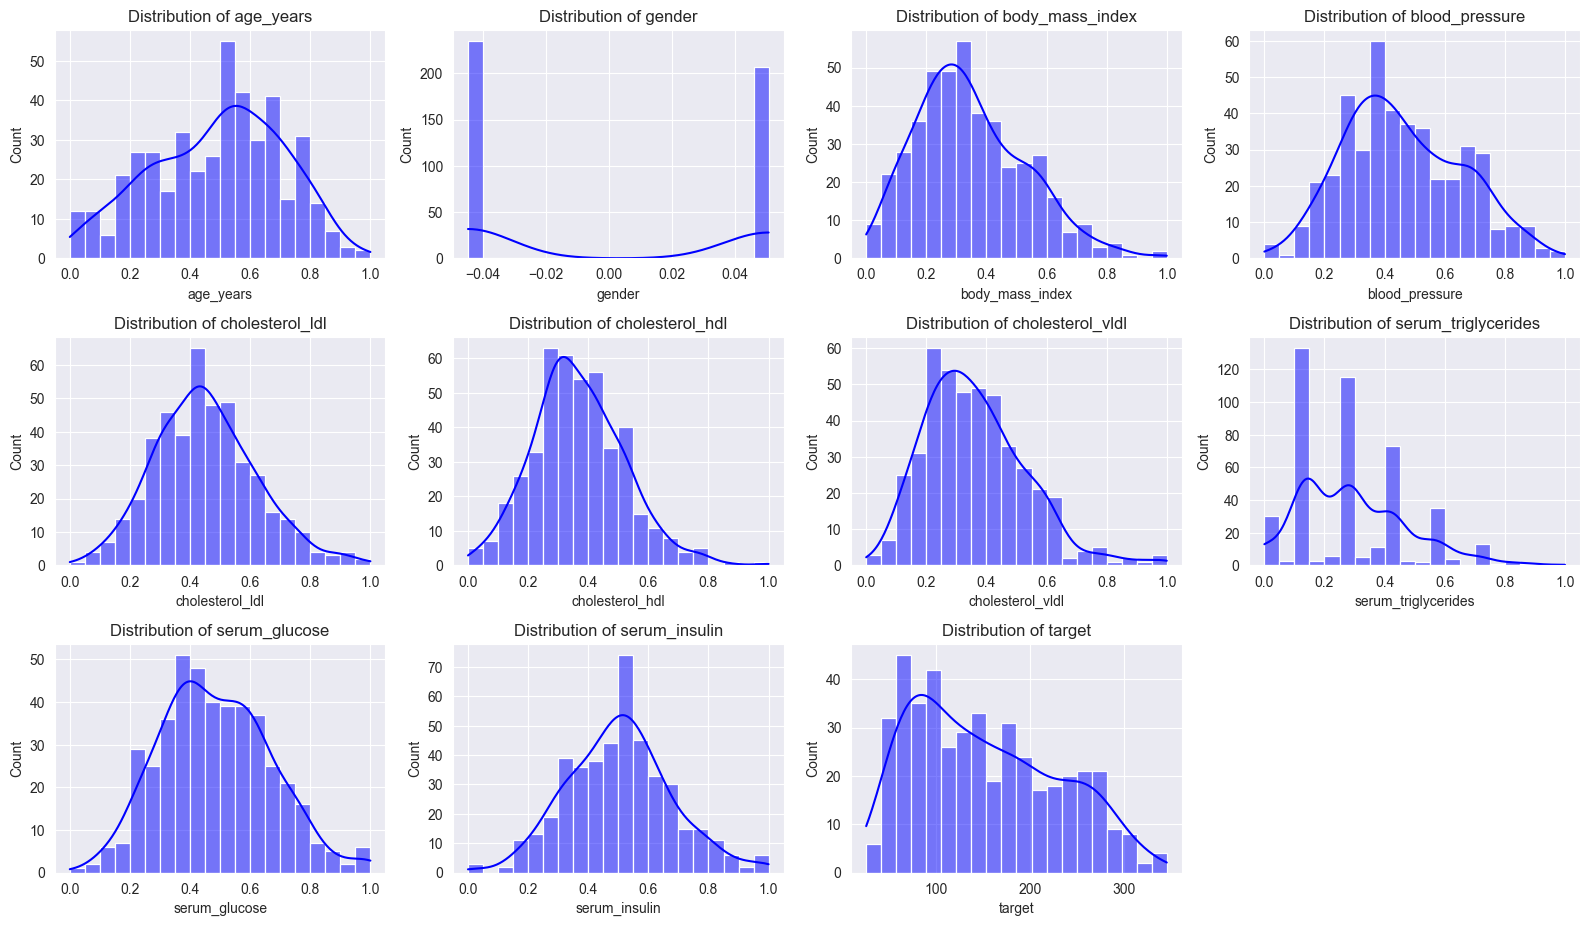

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude the proxy target column
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

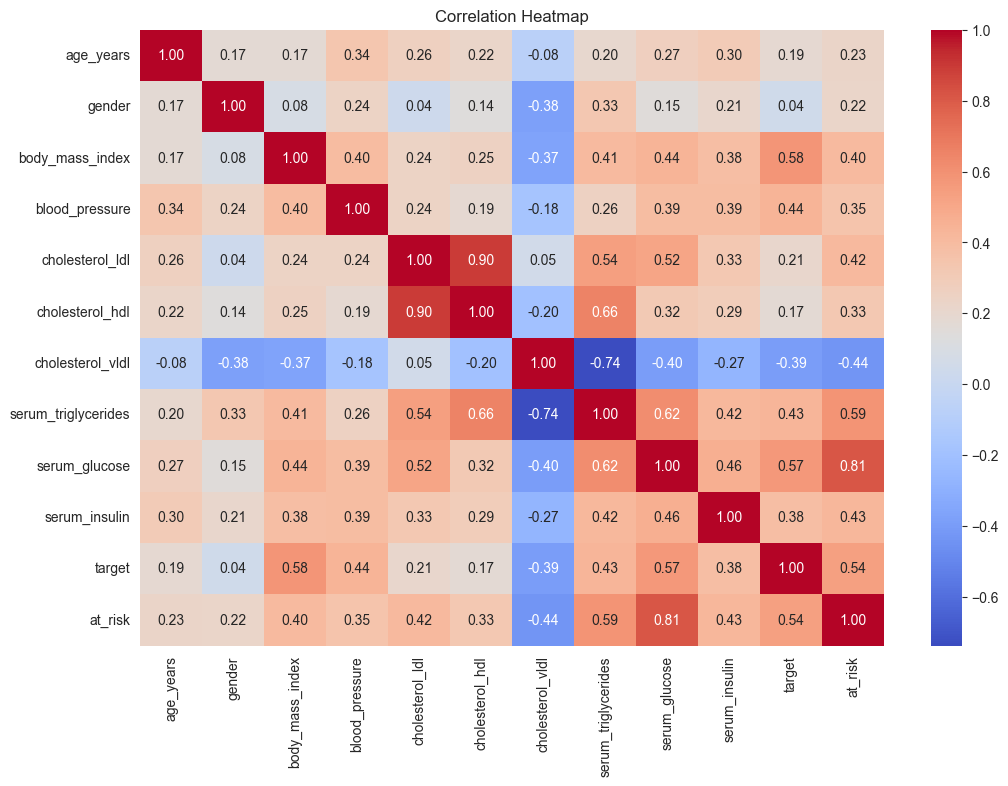

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

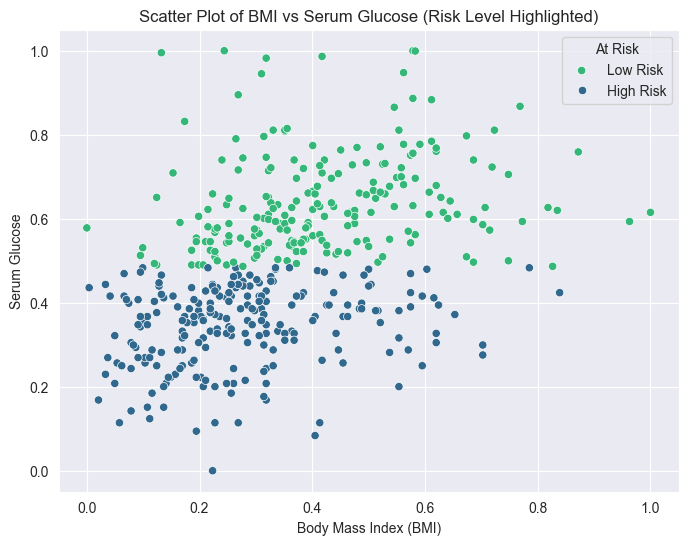

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='body_mass_index', y='serum_glucose', data=df, hue='at_risk', palette='viridis')
plt.title("Scatter Plot of BMI vs Serum Glucose (Risk Level Highlighted)")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Serum Glucose")
plt.legend(title="At Risk", labels=["Low Risk", "High Risk"])
plt.show()

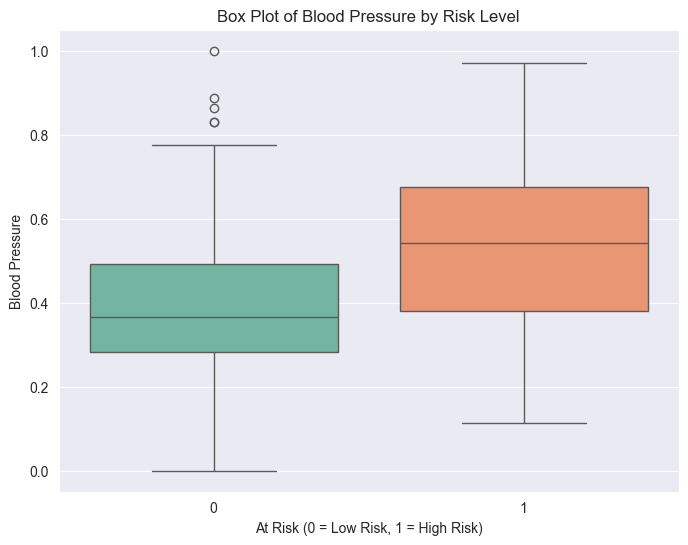

In [12]:
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='at_risk', y='blood_pressure', data=df, hue='at_risk', palette='Set2', dodge=False)
plt.title("Box Plot of Blood Pressure by Risk Level")
plt.xlabel("At Risk (0 = Low Risk, 1 = High Risk)")
plt.ylabel("Blood Pressure")
boxplot.get_legend().remove()

plt.show()